# Train CNN with MFCCs


## cnn_mffcs_reflection


Inspired by https://medium.com/@diego-rios/speech-emotion-recognition-with-convolutional-neural-network-ae5406a1c0f7


Import the necessary libraries


In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import os
import sys
import numpy as np
import random

In [2]:
# Get the absolute path to the project root without relying on __file__
notebook_path = os.getcwd()  # Gets current working directory
project_root = os.path.abspath(os.path.join(notebook_path, "../../.."))
sys.path.insert(0, project_root)

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1+cu118
True


Set the seed for reproducibility


In [4]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [5]:
model_name = 'cnn_mfccs_reflection'

train_csv = '../../../data/mfcc_train_dataset.csv'
test_csv = '../../../data/mfcc_test_dataset.csv'
val_csv = '../../../data/mfcc_val_dataset.csv'
root_dir = '../../../data/'
class_weights_path = '../../../data/class_weights.pt'

Import other helper classes


In [6]:
from cnn.datasets.MfccDataset import MFCCDataset
from cnn.pipeline.Pipeline import Pipeline

Import the model


In [7]:
from cnn.models.architectures.CNNMFCCs import CNNMFCCs

model = CNNMFCCs()

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNMFCCs(
  (conv1): Conv1d(40, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv4): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=22016, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=9, bias=True)
)

Visualize the model


In [8]:
summary(model, (40, 172))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 16, 172]           1,936
            Conv1d-2              [-1, 32, 172]           1,568
            Conv1d-3              [-1, 64, 172]           6,208
            Conv1d-4             [-1, 128, 172]          24,704
           Dropout-5             [-1, 128, 172]               0
            Linear-6                  [-1, 128]       2,818,176
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           8,256
            Linear-9                    [-1, 9]             585
Total params: 2,861,433
Trainable params: 2,861,433
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.49
Params size (MB): 10.92
Estimated Total Size (MB): 11.43
-------------------------------------

Define the learning rate, criterion, optimizer, transformations, and number of epochs


In [9]:
learning_rate = 0.001

class_weights = torch.load(class_weights_path).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define transformations
transform = transforms.Compose([])

num_epochs = 100

Prepare datasets and dataloaders


In [10]:
trainset = MFCCDataset(
    csv_file=train_csv, root_dir=root_dir, transform=transform)
valset = MFCCDataset(
    csv_file=val_csv, root_dir=root_dir, transform=transform)
testset = MFCCDataset(
    csv_file=test_csv, root_dir=root_dir, transform=transform)

trainloader = DataLoader(trainset, batch_size=128,
                         shuffle=True, num_workers=8, pin_memory=True)
valloader = DataLoader(valset, batch_size=128,
                       shuffle=False, num_workers=8, pin_memory=True)
testloader = DataLoader(testset, batch_size=128,
                        shuffle=False, num_workers=8, pin_memory=True)

Execute the pipeline


Mapping from Emotion to Number: {'Anger': 0, 'Bored': 1, 'Disgust': 2, 'Fear': 3, 'Happy': 4, 'Neutral': 5, 'Question': 6, 'Sad': 7, 'Surprise': 8}
Model is on: cuda:0
Epoch 1/100


Validating: 100%|██████████| 75/75 [00:03<00:00, 21.66it/s, Loss=1.206187129020691, Elapsed=3.6398s, ETA=0.0000s] 

Epoch 1 completed in 19.0544s
Train Loss: 1.4628421143989343 - Train Accuracy: 35.35198208995726
Validation Loss: 1.1928292973836263 - Validation Accuracy: 47.19290840016885

Epoch 2/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 67.93it/s, Loss=1.3215326070785522, Elapsed=1.2842s, ETA=0.0000s]


Epoch 2 completed in 6.5038s
Train Loss: 1.1499611606143114 - Train Accuracy: 48.19429682729925
Validation Loss: 1.105522719224294 - Validation Accuracy: 48.80751371886872

Epoch 3/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 63.28it/s, Loss=1.2542376518249512, Elapsed=1.3512s, ETA=0.0000s]


Epoch 3 completed in 6.3091s
Train Loss: 1.0492909376676371 - Train Accuracy: 52.69668257162886
Validation Loss: 1.015111005306244 - Validation Accuracy: 54.79105107640354

Epoch 4/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 66.90it/s, Loss=1.4549585580825806, Elapsed=1.2988s, ETA=0.0000s]

Epoch 4 completed in 6.3887s
Train Loss: 0.9911581682676525 - Train Accuracy: 55.00327898509758
Validation Loss: 1.0045333401362102 - Validation Accuracy: 54.20008442380752

Epoch 5/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 68.22it/s, Loss=1.4960248470306396, Elapsed=1.2802s, ETA=0.0000s]


Epoch 5 completed in 6.3023s
Train Loss: 0.9400148486470901 - Train Accuracy: 57.11539766174442
Validation Loss: 0.968781164487203 - Validation Accuracy: 57.03883495145631

Epoch 6/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 64.06it/s, Loss=1.2716383934020996, Elapsed=1.3603s, ETA=0.0000s]


Epoch 6 completed in 6.6235s
Train Loss: 0.8941192232459956 - Train Accuracy: 58.84760634087877
Validation Loss: 0.959638827641805 - Validation Accuracy: 58.262980160405235

Epoch 7/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 68.71it/s, Loss=1.0380908250808716, Elapsed=1.2721s, ETA=0.0000s]


Epoch 7 completed in 6.2494s
Train Loss: 0.853743974356293 - Train Accuracy: 60.53684900838968
Validation Loss: 0.9519547422726949 - Validation Accuracy: 57.95694385816801

Epoch 8/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 63.86it/s, Loss=1.2182129621505737, Elapsed=1.3517s, ETA=0.0000s]


Epoch 8 completed in 6.2318s
Train Loss: 0.8043545239922628 - Train Accuracy: 62.37760340109902
Validation Loss: 0.9601975878079733 - Validation Accuracy: 59.033347403967916

EarlyStopping counter: 1/7
Epoch 9/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 64.78it/s, Loss=1.2721329927444458, Elapsed=1.3268s, ETA=0.0000s]


Epoch 9 completed in 6.2738s
Train Loss: 0.7705262845995798 - Train Accuracy: 63.66658374980213
Validation Loss: 0.9529015549023946 - Validation Accuracy: 59.571549176867876

EarlyStopping counter: 2/7
Epoch 10/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 68.96it/s, Loss=0.9618043303489685, Elapsed=1.2793s, ETA=0.0000s]


Epoch 10 completed in 6.4604s
Train Loss: 0.7282228158043988 - Train Accuracy: 65.33547409601773
Validation Loss: 0.960573742389679 - Validation Accuracy: 59.67707893626003

EarlyStopping counter: 3/7
Epoch 11/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 66.15it/s, Loss=1.3297699689865112, Elapsed=1.3161s, ETA=0.0000s]


Epoch 11 completed in 6.4318s
Train Loss: 0.6861840527009413 - Train Accuracy: 66.9817507519052
Validation Loss: 0.9675313258171081 - Validation Accuracy: 60.331363444491345

EarlyStopping counter: 4/7
Epoch 12/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 67.16it/s, Loss=1.6622737646102905, Elapsed=1.2976s, ETA=0.0000s]

Epoch 12 completed in 6.5041s
Train Loss: 0.6475270985695668 - Train Accuracy: 68.41093598064269
Validation Loss: 1.0309159763654072 - Validation Accuracy: 59.645420008442386

EarlyStopping counter: 5/7
Epoch 13/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 66.56it/s, Loss=0.8479996919631958, Elapsed=1.2908s, ETA=0.0000s]

Epoch 13 completed in 6.5735s
Train Loss: 0.6122630451283703 - Train Accuracy: 69.91926912552859
Validation Loss: 1.0655996640523275 - Validation Accuracy: 60.48965808357957

EarlyStopping counter: 6/7
Epoch 14/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 71.39it/s, Loss=1.6483811140060425, Elapsed=1.2360s, ETA=0.0000s]


Epoch 14 completed in 6.1599s
Train Loss: 0.5630250573158264 - Train Accuracy: 71.96580810022387
Validation Loss: 1.089364751180013 - Validation Accuracy: 61.048965808357956

EarlyStopping counter: 7/7
🔁 Early stopping triggered!


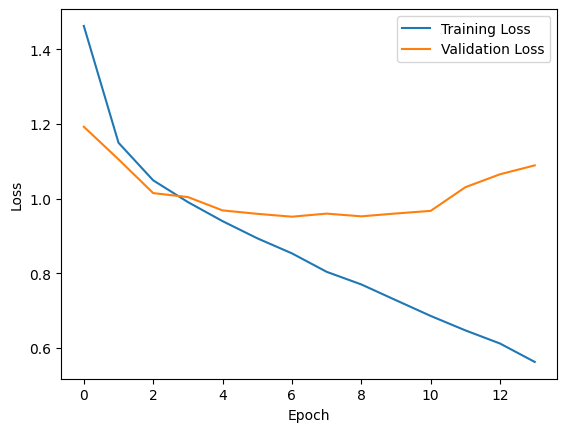

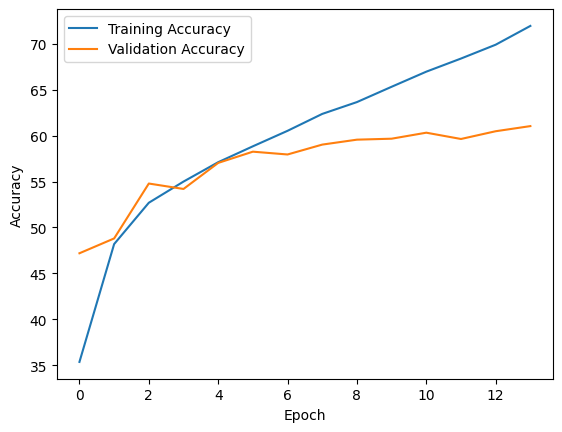

Evaluating best model on test set...


Testing: 100%|██████████| 75/75 [00:03<00:00, 20.33it/s]


Test Accuracy: 0.5969
Test Precision: 0.6196
Test Recall: 0.5969
Test F1-score: 0.5930

              precision    recall  f1-score   support

       Anger       0.65      0.64      0.64       916
       Bored       0.62      0.79      0.69      1098
     Disgust       0.37      0.64      0.47       291
        Fear       0.34      0.59      0.43       308
       Happy       0.72      0.40      0.52      1914
     Neutral       0.59      0.49      0.54      2226
    Question       0.68      0.75      0.71      1139
         Sad       0.62      0.67      0.65       857
    Surprise       0.53      0.74      0.62       728

    accuracy                           0.60      9477
   macro avg       0.57      0.64      0.59      9477
weighted avg       0.62      0.60      0.59      9477



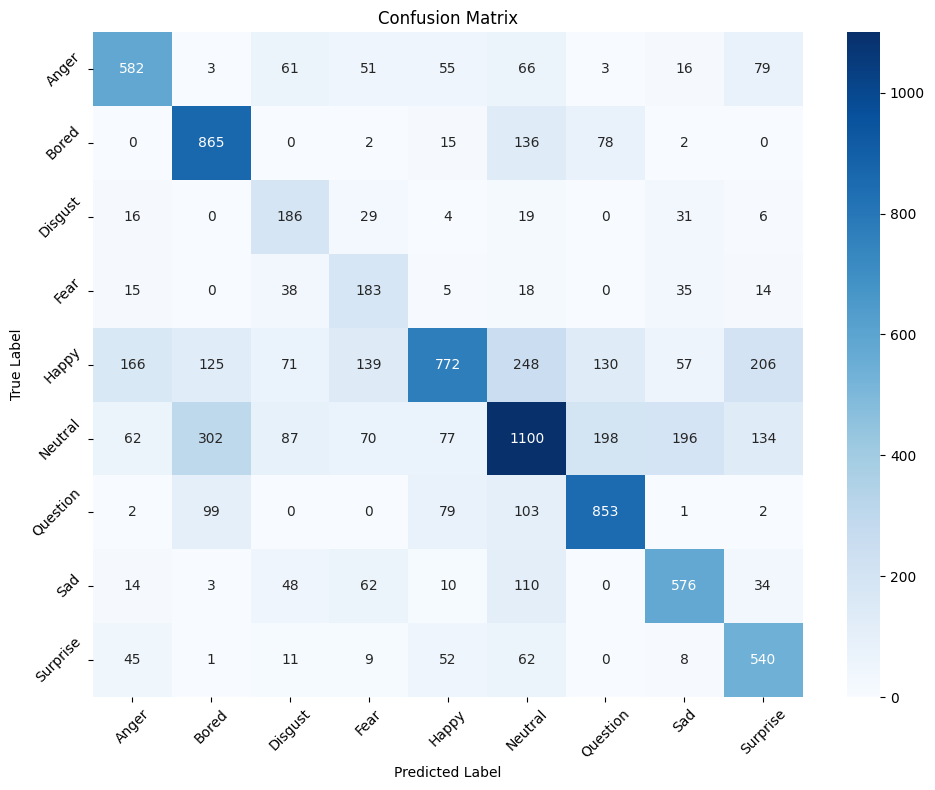

In [11]:
Pipeline.execute(
    model=model,
    labelmap=trainset.label_map,
    trainloader=trainloader,
    valloader=valloader,
    testloader=testloader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=num_epochs,
    model_name=model_name,
    patience=7
)